In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset1=pd.read_csv("Wine.csv",index_col=None)
df2=dataset1
df2 = pd.get_dummies(df2, drop_first=True,dtype=int)
indep_X=df2.drop('Customer_Segment',axis= 1)
dep_Y=df2['Customer_Segment']


In [3]:
df2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.3, random_state=42)


In [5]:
# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)    
  
    

In [6]:
# Apply PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


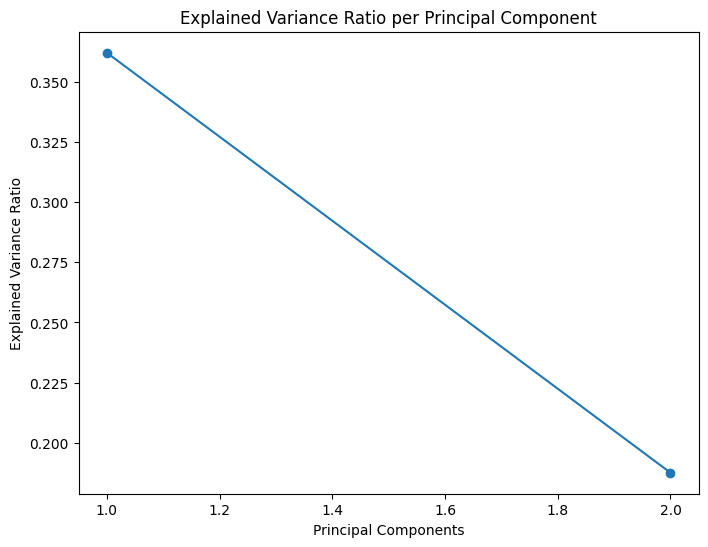

In [7]:
# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [8]:
# Models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear"),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}


Model Accuracy with PCA-transformed Features:
Logistic Regression: 0.9630
SVM (Linear): 0.9815
KNN: 0.9815
Random Forest: 0.9815


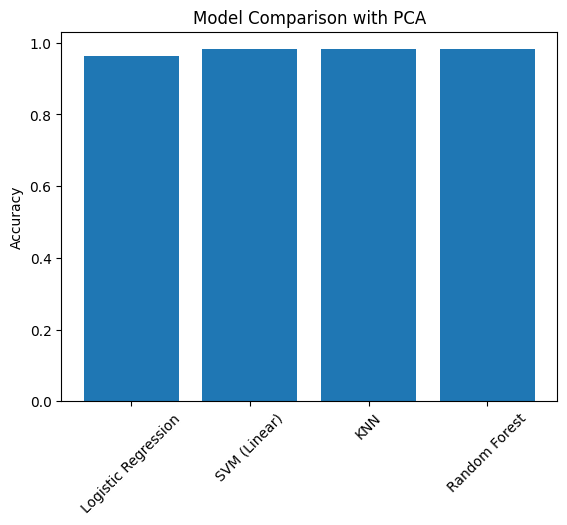

In [9]:
# Training and evaluating models
results = {}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)  # Train the model with PCA-transformed features
    y_pred = model.predict(X_test_pca)  # Predict with PCA-transformed test set
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

#Print the results of each model
print("Model Accuracy with PCA-transformed Features:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

#Optionally, plot results
plt.bar(results.keys(), results.values())
plt.title('Model Comparison with PCA')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [10]:
#Create a pandas DataFrame to display results in a table format
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)  # Sort by accuracy in descending order
#Print the results in table format
print("Model Accuracy with PCA-transformed Features:")
print(results_df)


Model Accuracy with PCA-transformed Features:
                 Model  Accuracy
1         SVM (Linear)  0.981481
2                  KNN  0.981481
3        Random Forest  0.981481
0  Logistic Regression  0.962963
